## Mutal information score

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

##  Read Train Dataset

In [2]:
import pandas as pd 
df = pd.read_csv("train_titanic (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check Missing Values

In [5]:
s=df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Seprate X and Y Features from Dataset

In [6]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [7]:
X.shape

(891, 8)

In [8]:
Y.shape

(891, 1)

## Sperate cat and con from X

In [9]:
cat = list(X.columns[X.dtypes=='object'])

con = list (X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Cabin', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Preprocessing 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
# Creating a num pipe
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
# Creating a cat pipe
cat_pipe =Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('Orfdinal',OrdinalEncoder())])

# Combine both Pipelins
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [14]:
x_pre = pre.fit_transform(X)
x_pre

array([[  0.82737724,  -0.5924806 ,   0.43279337, ...,   1.        ,
        147.        ,   2.        ],
       [ -1.56610693,   0.63878901,   0.43279337, ...,   0.        ,
         81.        ,   0.        ],
       [  0.82737724,  -0.2846632 ,  -0.4745452 , ...,   0.        ,
        147.        ,   2.        ],
       ...,
       [  0.82737724,   0.        ,   0.43279337, ...,   0.        ,
        147.        ,   2.        ],
       [ -1.56610693,  -0.2846632 ,  -0.4745452 , ...,   1.        ,
         60.        ,   0.        ],
       [  0.82737724,   0.17706291,  -0.4745452 , ...,   1.        ,
        147.        ,   1.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [16]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


## Features Selection with Mutual information

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,Y)
mi

array([0.04856472, 0.0330886 , 0.00815624, 0.02938026, 0.12940113,
       0.1524789 , 0.0623877 , 0.02181157])

In [18]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.152479
num__Fare        0.129401
cat__Cabin       0.062388
num__Pclass      0.048565
num__Age         0.033089
num__Parch       0.029380
cat__Embarked    0.021812
num__SibSp       0.008156
dtype: float64

In [19]:
mi.index

Index(['cat__Sex', 'num__Fare', 'cat__Cabin', 'num__Pclass', 'num__Age',
       'num__Parch', 'cat__Embarked', 'num__SibSp'],
      dtype='object')

<Axes: title={'center': 'Count plot for mutual information'}>

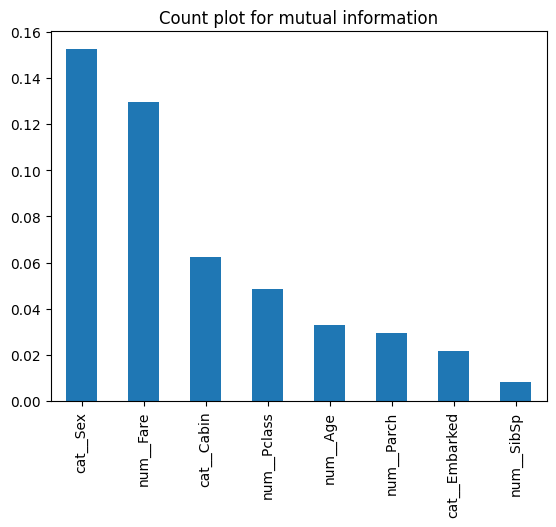

In [20]:
mi.plot(kind='bar',title='Count plot for mutual information')

In [21]:
sel_col = list(mi.index[0:4])
sel_col

['cat__Sex', 'num__Fare', 'cat__Cabin', 'num__Pclass']

In [22]:
from sklearn.feature_selection import  SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel_feature = sel.fit_transform(x_pre,Y)
sel_cols = sel.get_feature_names_out()

In [23]:
sel_cols

array(['num__Pclass', 'num__Fare', 'cat__Sex', 'cat__Cabin'], dtype=object)

## Extract important columns names

In [24]:
sel_cols[0].split('__')[1]

'Pclass'

In [25]:
imp_cols = []
for i in sel_cols:
    s= i.split('__')[1]
    imp_cols.append(s)

In [26]:
imp_cols

['Pclass', 'Fare', 'Sex', 'Cabin']

In [27]:
X_sel = X[imp_cols]
X_sel

,Pclass,Fare,Sex,Cabin
0,3,7.2500,male,NaN
1,1,71.2833,female,C85
2,3,7.9250,female,NaN
3,1,53.1000,female,C123
4,3,8.0500,male,NaN
...,...,...,...,...
886,2,13.0000,male,NaN
887,1,30.0000,female,B42
888,3,23.4500,female,NaN
889,1,30.0000,male,C148


## Create a final Pipeline

In [28]:
cat_sel = list (X_sel.columns[X_sel.dtypes=='object'])
con_sel = list (X_sel.columns[X_sel.dtypes!='object'])

In [29]:
cat_sel

['Sex', 'Cabin']

In [30]:
con_sel

['Pclass', 'Fare']

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
## NUM PIPE
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

## CAT PIPE
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unkown')),
                            ("OHE",OneHotEncoder(handle_unknown='ignore'))])

## COMBIBINE
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)])

In [33]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724, -0.50244517,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.78684529,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.48885426,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.17626324,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.04438104,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.49237783,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
f_cols = pre2.get_feature_names_out()
f_cols[0:5]

array(['num__Pclass', 'num__Fare', 'cat__Sex_female', 'cat__Sex_male',
       'cat__Cabin_A10'], dtype=object)

In [35]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=f_cols)
X_sel_pre

,num__Pclass,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,cat__Cabin_A23,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unkown
0,0.827377,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.386671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test split
80% - train

20% - test

In [36]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.30,random_state=64)

In [37]:
xtrain.shape

(623, 152)

In [38]:
xtest.shape

(268, 152)

## Create a Logistic Regression model

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

## Chech accuracy in train and test

In [41]:
model.score(xtrain,ytrain)

0.8298555377207063

In [42]:
model.score(xtest,ytest)

0.7873134328358209

## Hyperparameter tunning 

In [43]:
params = {'C':[0.01,0.1,10,100,1000]}

In [45]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
gscv = GridSearchCV(lr,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 10, 100, 1000]}, scoring='f1_macro')

## predict the values

In [46]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [47]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0])

In [48]:
ytrain.head()

,Survived
312,0
749,0
264,0
83,0
213,0


In [49]:
ypred_ts[0:5]

array([0, 1, 1, 1, 1])

In [50]:
ytest.head()

,Survived
189,0
726,1
218,1
290,1
816,0


## Confusion matrix display

In [52]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_tr)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

ValueError: Found input variables with inconsistent numbers of samples: [268, 623]